In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehemmedhaciyev","key":"38713a17258cfda4d7a1f05214804bc0"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [ ]:
!kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
yes


In [ ]:
!unzip '/content/fruit-and-vegetable-image-recognition.zip'

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/train'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 36 directories and 0 images in "/content/train".
There are 0 directories and 79 images in "/content/train/pomegranate".
There are 0 directories and 82 images in "/content/train/carrot".
There are 0 directories and 75 images in "/content/train/banana".
There are 0 directories and 97 images in "/content/train/soy beans".
There are 0 directories and 91 images in "/content/train/sweetcorn".
There are 0 directories and 92 images in "/content/train/garlic".
There are 0 directories and 92 images in "/content/train/cabbage".
There are 0 directories and 69 images in "/content/train/sweetpotato".
There are 0 directories and 87 images in "/content/train/chilli pepper".
There are 0 directories and 77 images in "/content/train/potato".
There are 0 directories and 83 images in "/content/train/paprika".
There are 0 directories and 88 images in "/content/train/kiwi".
There are 0 directories and 68 images in "/content/train/apple".
There are 0 directories and 79 images in "/content/train/caul

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random

def view_random_image(target_dir, target_class):
    target_dir = pathlib.Path(target_dir) / target_class
    random_image = random.choice(os.listdir(target_dir))
    image_path = target_dir / random_image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img.shape

(272, 484, 3)

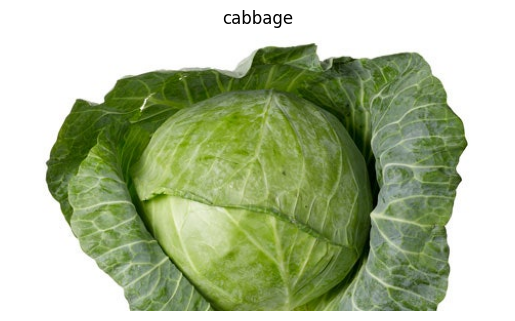

In [ ]:
view_random_image(target_dir = '/content/train',target_class = 'cabbage' )

In [ ]:
train_data_path = '/content/train'
test_data_path = '/content/test'
validation_data = '/content/test'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_path,
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 label_mode = 'categorical',
                                                                 validation_split = False,
                                                                 crop_to_aspect_ratio = True,
                                                                 shuffle = True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_path,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical',
                                                                batch_size = 32,
                                                                validation_split = False,
                                                                crop_to_aspect_ratio = True,
                                                                shuffle = False)

val_data = tf.keras.preprocessing.image_dataset_from_directory(validation_data,
                                                               image_size = IMG_SIZE,
                                                               label_mode = 'categorical',
                                                               batch_size = 32,
                                                               validation_split = False,
                                                               crop_to_aspect_ratio = True,
                                                               shuffle = False)


Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
class_names = train_data.class_names
len(class_names)

36

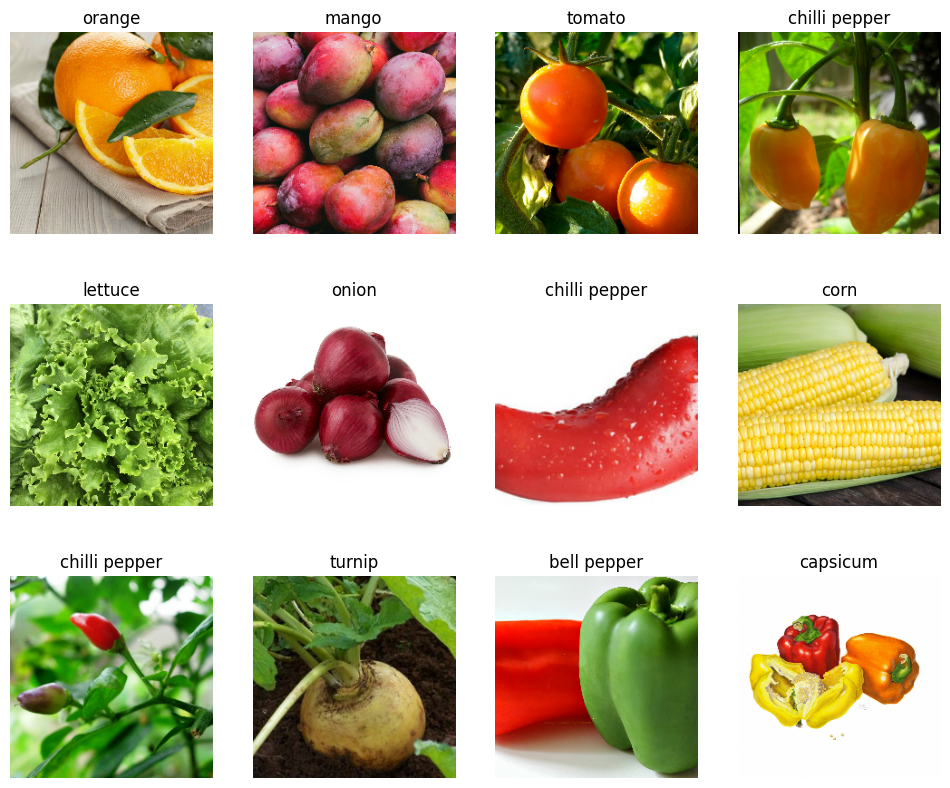

In [ ]:
import numpy as np

class_names = train_data.class_names

plt.figure(figsize = (12, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i] / 255)
        # Get the index of the maximum value (predicted class)
        predicted_class_index = np.argmax(labels[i].numpy())
        plt.title(class_names[predicted_class_index]) # Use the index to access class_names
        plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Rescaling(1 / 255),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(36, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,959,332 (26.55 MB)

 Trainable params: 6,959,332 (26.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, validation_data = val_data, epochs = 5)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 644ms/step - accuracy: 0.0211 - loss: 5.1388 - val_accuracy: 0.0279 - val_loss: 3.5837
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.0253 - loss: 3.5839 - val_accuracy: 0.0279 - val_loss: 3.5836
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 578ms/step - accuracy: 0.0328 - loss: 3.5810 - val_accuracy: 0.0306 - val_loss: 3.5817
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 614ms/step - accuracy: 0.0328 - loss: 3.5800 - val_accuracy: 0.0390 - val_loss: 3.5826
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 655ms/step - accuracy: 0.0284 - loss: 3.5826 - val_accuracy: 0.0167 - val_loss: 3.5818


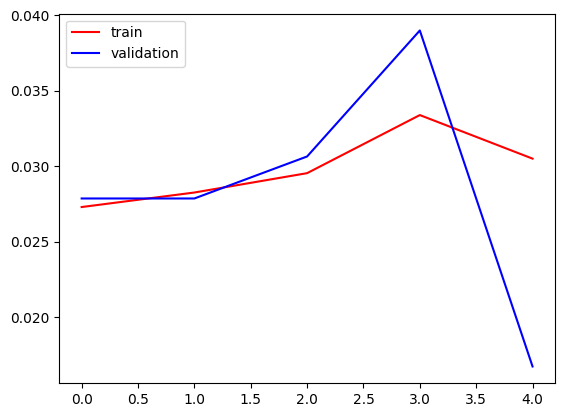

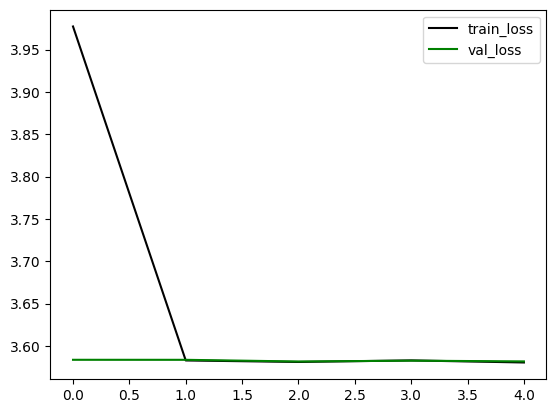

In [ ]:
 import matplotlib.pyplot as plt
 plt.plot(history.history['accuracy'],color='red',label='train')
 plt.plot(history.history['val_accuracy'],color='blue',label='validation')
 plt.legend()
 plt.show()
plt.plot(history.history['loss'],color='black',label='train_loss')
plt.plot(history.history['val_loss'],color='green',label='val_loss')
plt.legend()
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224 , 224, 3)),
    tf.keras.layers.Rescaling(1 / 255),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(36, activation = 'softmax')

])

In [ ]:
model2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,706,436 (6.51 MB)

 Trainable params: 1,705,956 (6.51 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

In [ ]:
history = model2.fit(train_data, validation_data = val_data, epochs = 15,
                    callbacks = [early_stopping])

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 649ms/step - accuracy: 0.0348 - loss: 4.1330 - val_accuracy: 0.0279 - val_loss: 4.9077
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 631ms/step - accuracy: 0.0289 - loss: 3.5817 - val_accuracy: 0.0306 - val_loss: 3.7019
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 621ms/step - accuracy: 0.0330 - loss: 3.5790 - val_accuracy: 0.0529 - val_loss: 3.5760
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 584ms/step - accuracy: 0.0352 - loss: 3.5763 - val_accuracy: 0.0446 - val_loss: 3.5549
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 651ms/step - accuracy: 0.0341 - loss: 3.5788 - val_accuracy: 0.0390 - val_loss: 3.5686
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 603ms/step - accuracy: 0.0356 - loss: 3.5913 - val_accuracy: 0.0306 - val_loss: 3.5802
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 739ms/step - accuracy: 0.0343 - loss: 3.5787 - val_accuracy: 0.0279 - val_loss: 3.5846


In [ ]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3))

x = tf.keras.applications.resnet50.preprocess_input(inputs)

base_model = tf.keras.applications.ResNet50(include_top = False, input_tensor = x)
base_model.trainable = False

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(36, activation = 'softmax')(avg)
classifier_model = tf.keras.Model(inputs = inputs, outputs = output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

check_point = tf.keras.callbacks.ModelCheckpoint('best_model.keras',
                                                 monitor = 'val_loss',
                                                 save_best_only = True)

classifier_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = classifier_model.fit(train_data, epochs = 15, validation_data = val_data,
                     callbacks = [early_stopping, check_point])

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 787ms/step - accuracy: 0.4282 - loss: 2.3231 - val_accuracy: 0.9109 - val_loss: 0.3735
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 612ms/step - accuracy: 0.8732 - loss: 0.4765 - val_accuracy: 0.9415 - val_loss: 0.2467
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 593ms/step - accuracy: 0.9207 - loss: 0.2866 - val_accuracy: 0.9359 - val_loss: 0.2135
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 629ms/step - accuracy: 0.9353 - loss: 0.2132 - val_accuracy: 0.9554 - val_loss: 0.1711
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 638ms/step - accuracy: 0.9596 - loss: 0.1552 - val_accuracy: 0.9666 - val_loss: 0.1462
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 599ms/step - accuracy: 0.9729 - loss: 0.1223 - val_accuracy: 0.9610 - val_loss: 0.1310
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 595ms/step - accuracy: 0.9773 - loss: 0.0975 - val_accuracy: 0.9694 - val_loss: 0.1251
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 636ms/step - accuracy: 0.9777 - loss: 0.0892 - val_accu

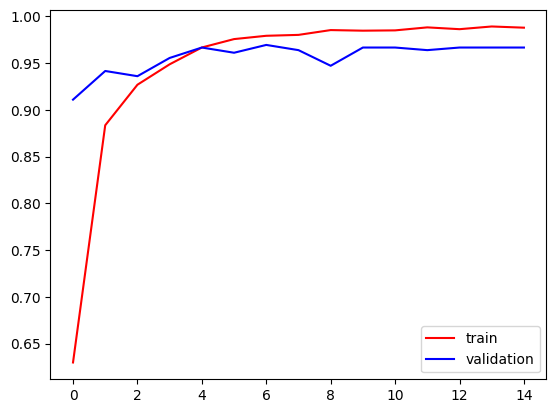

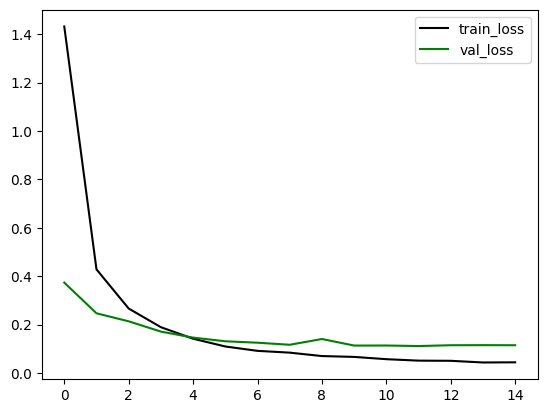

In [ ]:
 import matplotlib.pyplot as plt
 plt.plot(history.history['accuracy'],color='red',label='train')
 plt.plot(history.history['val_accuracy'],color='blue',label='validation')
 plt.legend()
 plt.show()
plt.plot(history.history['loss'],color='black',label='train_loss')
plt.plot(history.history['val_loss'],color='green',label='val_loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in val_data], axis=0)
y_pred_probs = classifier_model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 782ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
from sklearn.metrics import classification_report

y_true = np.concatenate([y for x, y in val_data], axis=0)
y_pred_probs = classifier_model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_true to multiclass format by selecting the index of the true label
y_true_multiclass = np.argmax(y_true, axis=1)

# Now, use y_true_multiclass for the classification report
print(classification_report(y_true_multiclass, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 636ms/step
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00        10
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        10
           5       0.90      0.90      0.90        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       0.91      1.00      0.95        10
           9       1.00      0.70      0.82        10
          10       1.00      1.00      1.00        10
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       0.91      1.00      0.95        10
          16       1.00      1.00      1

In [ ]:
img = '/content/photo_144195.jpg'

img = tf.keras.utils.load_img(img, target_size = IMG_SIZE)
img_arr = tf.keras.utils.array_to_img(img)
img_bat = tf.expand_dims(img_arr, 0)

In [ ]:
predict = classifier_model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(class_names[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Veg/Fruit in image is banana with accuracy of 7.08
